In [289]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [290]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [291]:
# Direct convolution between 
def d_conv(W, X):
    # for i in range(0, len(W)):/A
        
    return (X * W)

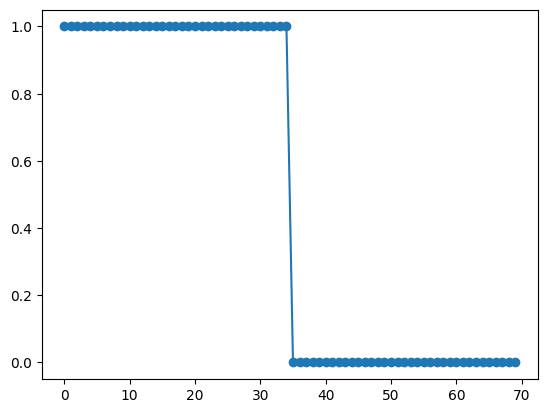

In [292]:
n = 70
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

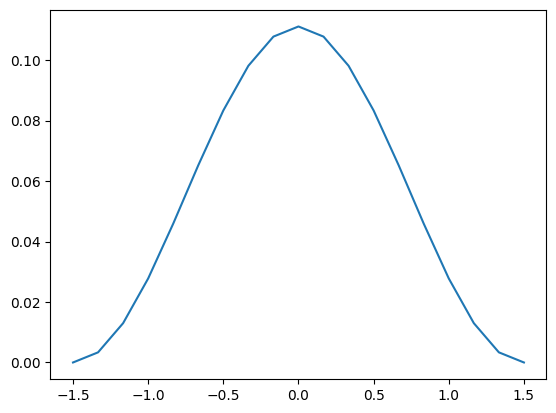

In [293]:
delta = 10.3
M = 3./2
time_domain = 6
t = np.arange(-time_domain*M, time_domain*M + 1)
f = 1/2 +1/2*np.cos(np.pi * (t/(time_domain * M)))
f/= np.sum(f)
plt.plot(t/time_domain,f)

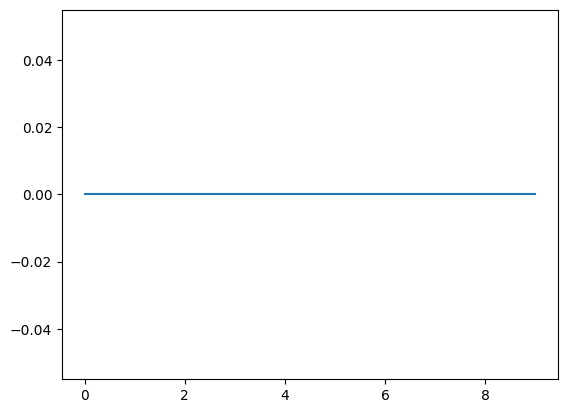

In [298]:
freq_domain = 10
a = np.arange(freq_domain)
F =np.zeros(freq_domain)

from sympy import *


x = Symbol('x')
# print(F)
plt.plot(a,F)

In [295]:
# h = np.fft.ifft(G)
# plt.plot(w,h)

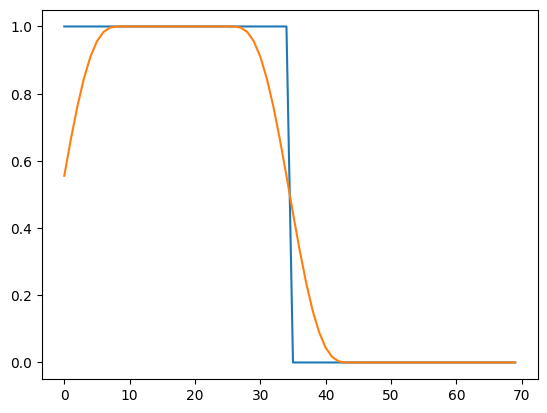

In [296]:
# Apply filter to each point of y
# h = np.fft.ifft(H)

x_shifted_filter = np.zeros(n, dtype=complex)

# print(np.sum(f))
x_shifted_filter = np.convolve(X,f, 'same')
# x_shifted_filter /= 

# x_shifted_filter = convolve_1d(x_shifted, H)

# for i in range(n):
#     A = 0   
    
#     # At the beginning
#     if i - M//2 < 0:
#         for j in range(n - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
            
            
#     # At the end
#     elif i + M // 2 > n:
#         for j in range(i - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
        
#     # In the middle.
#     elif i > M // 2 and i + M // 2  < n:
#         for j in range(i - M//2, i + M//2):
#             A += X[j] * h[j % M] 
            
#         # print(i)
#     x_shifted_filter[i] = A

# x_shifted_filter /= M
plt.plot(x,X)
# plt.plot(x,x_shifted.real)
plt.plot(x,x_shifted_filter)